In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np

%matplotlib inline 

In [2]:
data = pd.read_csv("adult.csv")
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
def cc(x):
    return sum(x=='?')
data.apply(cc)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [5]:
data = data[~data['workclass'].isin(['?'])]
data = data[~data['occupation'].isin(['?'])]
data = data[~data['native.country'].isin(['?'])]

In [6]:
for i in data.columns:
    if type(data[i][1])== str:
        print(data[i].value_counts())

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64
Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital.status, dtype: int64
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-ins

In [7]:
data_c = data.copy()

In [10]:
data_c.loc[data['native.country']!='United-States','native.country'] = 'non_usa'

In [11]:
data_c.loc[data_c['income']=='<=50K','income'] = 0
data_c.loc[data_c['income']=='>50K','income'] = 1

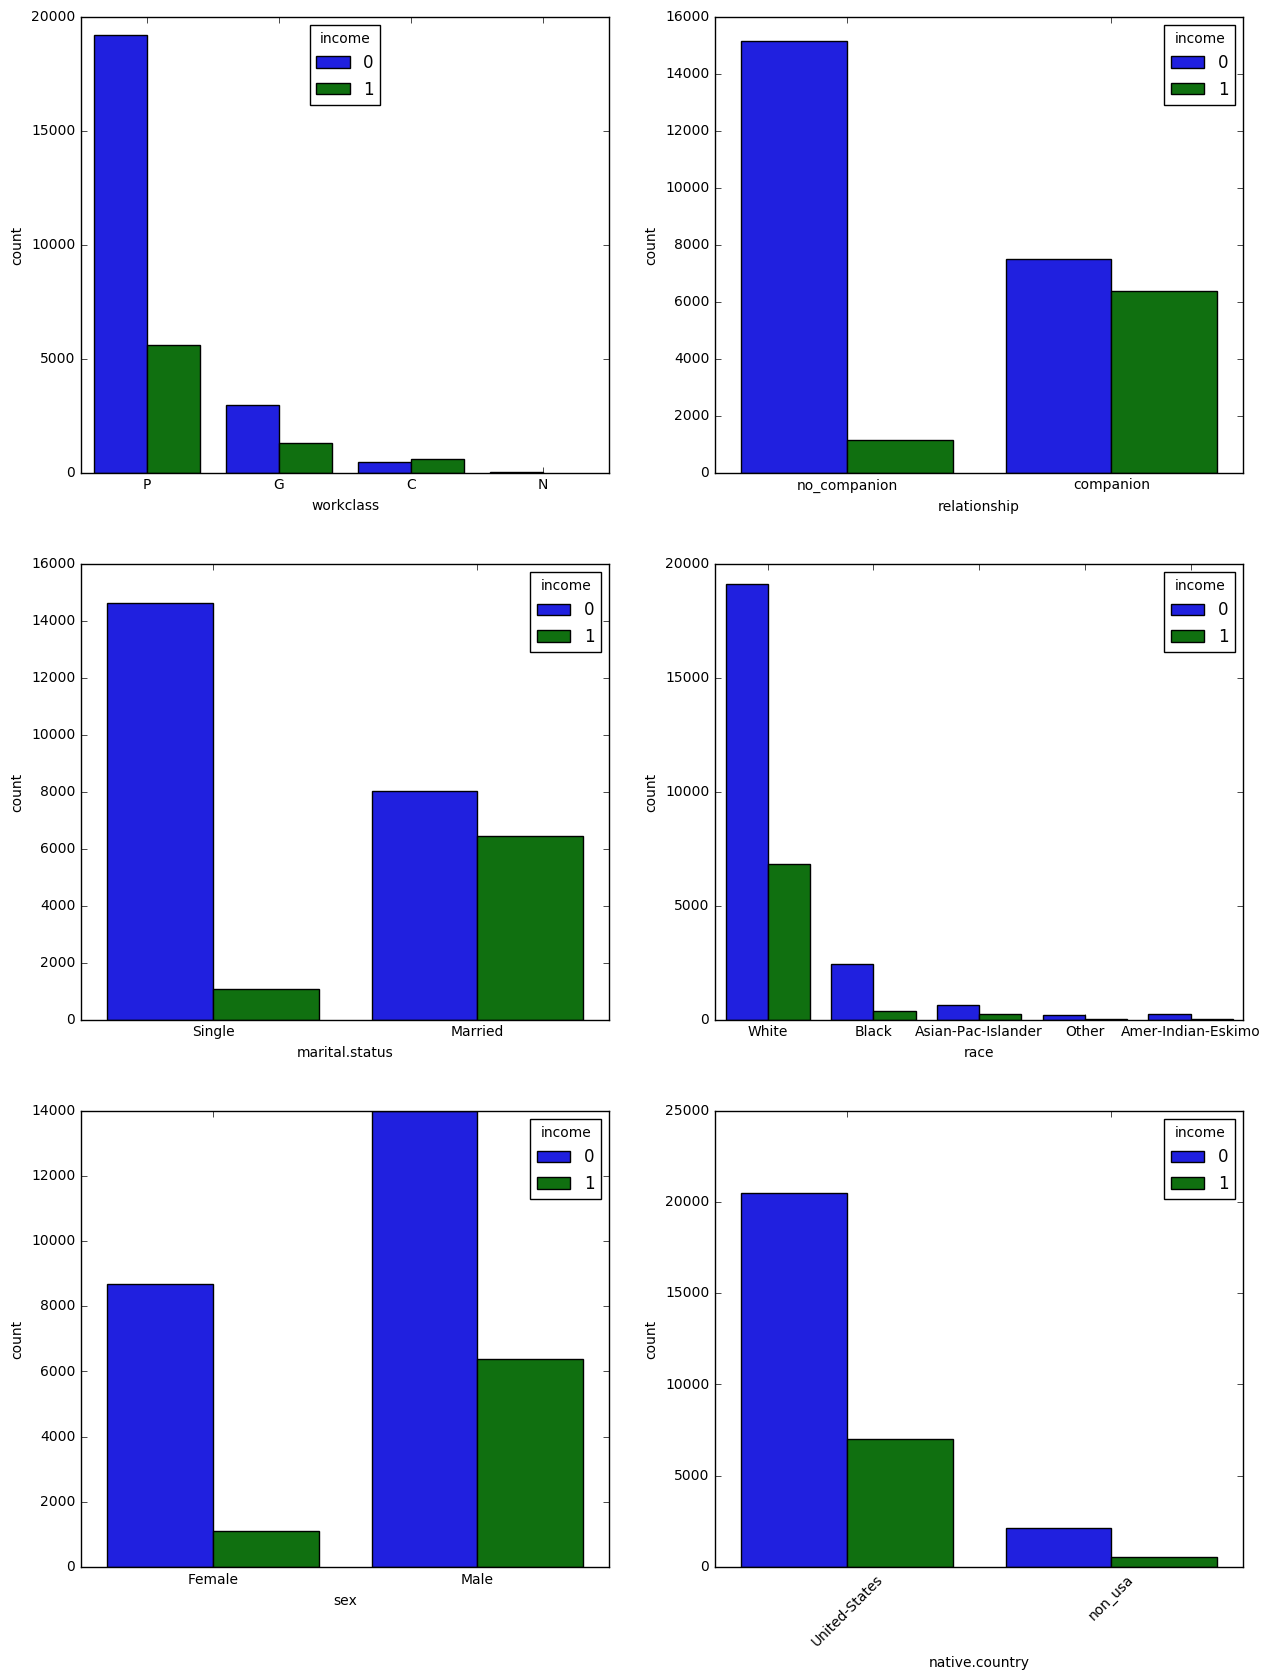

In [14]:
fig, ((a,b),(c,d),(e,f)) = plt.subplots(3,2,figsize=(15,20))
plt.xticks(rotation=45)
sns.countplot(data_c['workclass'],hue=data_c['income'],ax=a)
sns.countplot(data_c['relationship'],hue=data_c['income'],ax=b)
sns.countplot(data_c['marital.status'],hue=data_c['income'],ax=c)
sns.countplot(data_c['race'],hue=data_c['income'],ax=d)
sns.countplot(data_c['sex'],hue=data_c['income'],ax=e)
sns.countplot(data_c['native.country'],hue=data_c['income'],ax=f)

In [24]:
data_c['marital.status']=data_c['marital.status'].map({'Married-civ-spouse':'Married', 'Divorced':'Single',
                                                       'Never-married':'Single', 'Separated':'Single', 
                                                       'Widowed':'Single', 'Married-spouse-absent':'Married', 'Married-AF-spouse':'Married'})
data_c['workclass'] = data_c.workclass.map({'Private':'P', 'State-gov':'G', 'Federal-gov':'G', 
                                            'Self-emp-not-inc':'P', 'Self-emp-inc':'C', 'Local-gov':'G', 'Without-pay':'N'})
data_c['relationship']=data_c['relationship'].map({'Not-in-family':'no_companion', 'Unmarried':'no_companion',
                                                   'Own-child':'companion', 'Other-relative':'no_companion', 
                                                   'Husband':'companion', 'Wife':'companion'})
data_c['t_capital']=data_c['capital.gain']-data_c['capital.loss']
data_c['longhours'] = data_c['hours.per.week'] > 40

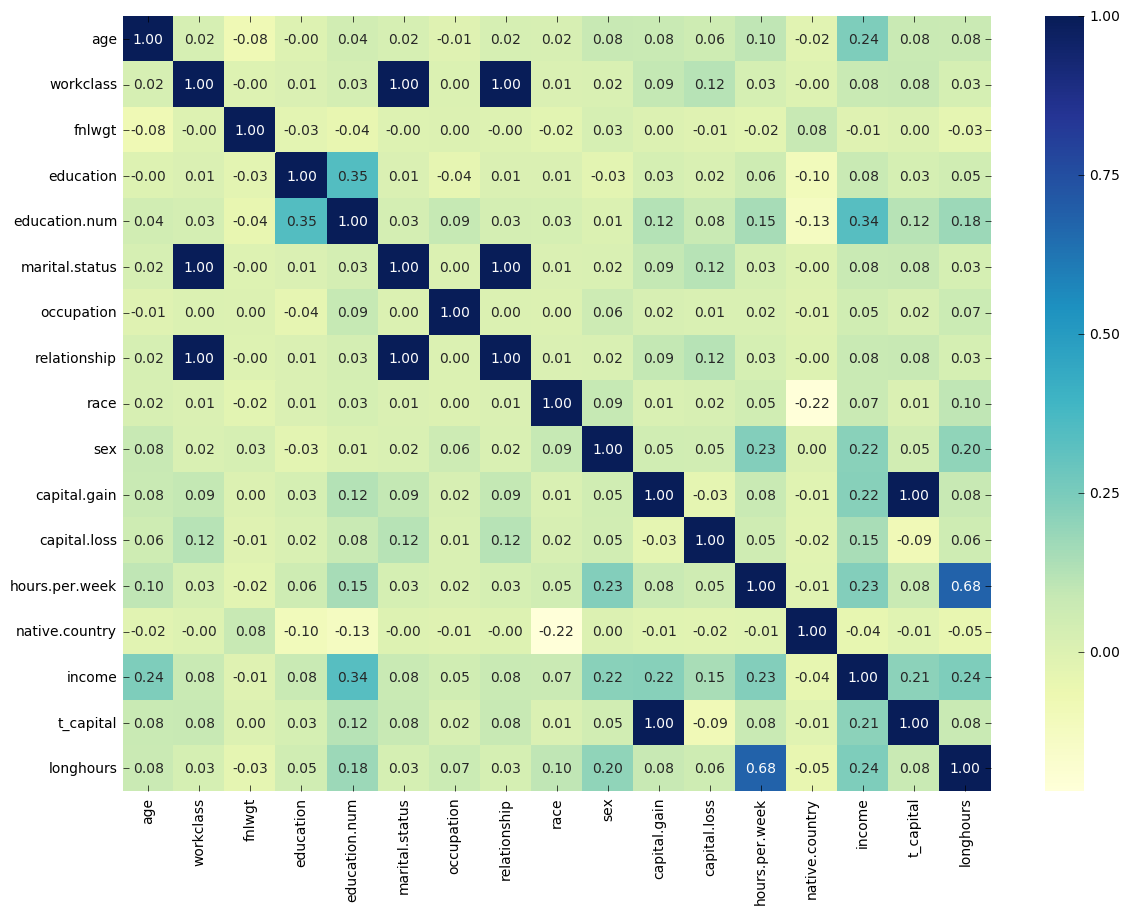

In [25]:
for column in data_c:
    enc=LabelEncoder()
    if data_c.dtypes[column]==np.object:
         data_c[column]=enc.fit_transform(data_c[column])
            
plt.figure(figsize=(14,10))
sns.heatmap(data_c.corr(),annot=True,fmt='.2f',cmap='YlGnBu')
plt.show()

In [26]:
from sklearn import preprocessing

In [27]:
data_c['age']= preprocessing.scale(data_c['age'])

In [28]:
data_c.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,t_capital
count,3.016200e+04,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,1.056210e-15,15080.500000,1.897938e+05,10.333764,10.121312,15080.500000,5.959850,15080.500000,3.678602,0.675685,1092.007858,88.372489,40.931238,0.088124,0.248922,1003.635369
std,1.000017e+00,8707.163746,1.056530e+05,3.812292,2.549995,8707.163746,4.029566,8707.163746,0.834709,0.468126,7406.346497,404.298370,11.979984,0.283480,0.432396,7430.372730
min,-1.632189e+00,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-4356.000000
25%,-7.946967e-01,7540.250000,1.176272e+05,9.000000,9.000000,7540.250000,2.000000,7540.250000,4.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000
50%,-1.094756e-01,15080.500000,1.784250e+05,11.000000,10.000000,15080.500000,6.000000,15080.500000,4.000000,1.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000
75%,6.518811e-01,22620.750000,2.376285e+05,12.000000,13.000000,22620.750000,9.000000,22620.750000,4.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000
max,3.925715e+00,30161.000000,1.484705e+06,15.000000,16.000000,30161.000000,13.000000,30161.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,99999.000000


In [20]:
%history

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np

%matplotlib inline
data = pd.read_csv("adult.csv")
data.head()
data.info()
def cc(x):
    return sum(x=='?')
data.apply(cc)
data = data[~data['workclass'].isin(['?'])]
data = data[~data['occupation'].isin(['?'])]
data = data[~data['native.country'].isin(['?'])]
for i in data.columns:
    if type(data[i][1])== str:
        print(data[i].value_counts())
data_c = data.copy()
#data_c.loc[data['native.country']!='United-States','native.country'] = 'non_usa'
'non_usa' = data_c.loc[data['native.country']!='United-States','native.country']
data_c.loc[data['native.country']!='United-States','native.country'] = 'non_usa'
data_c.loc[data_c['income']=='<=50K','income'] = 0
data_c.loc[data_c['income']=='>50K','income'] = 1
fig, ((a,b),(c,d),(e,f)) = plt